# TOF data
Data taken at intervals of $T=0.1ms$, where $T$ represents the period of free flight after trapping. Captured in sequences of 10 ranging from 0.1ms to 1.0ms. 

In [8]:
import os
import sys
sys.path.append("../")
import datarun
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

In [9]:
d = datarun.Experiment(
    vstart = .1,
    vend = 1.0,
    vstep = .1, 
    idx_start = 11,
    datapath = "../data/mar02/",
    numtrials = 10,
    mask=0.25
)

|██████████████                          | ▁▃▅ 35/100 [35%] in 1:05 (~2:00, 0.5/s) 

In [3]:
sigma_times = d.structure_data(lambda d : d.popt_x[2]**2)

removed_count = 0
for key in sigma_times:
    sigma = np.std(sigma_times[key]) 
    mean = np.mean(sigma_times[key])
    for val in sigma_times[key]:
        if np.abs(val-mean) > 2*sigma:
            sigma_times[key].remove(val)
            print(key, val)

means = [np.mean(arr) for arr in sigma_times.values()]
errs = [np.std(arr) for arr in sigma_times.values()]
time_list = np.array(list(sigma_times.keys()))

0.1 2.912666327926189e-07
0.2 2.0476562497466936e-07
0.6 2.744355087080773e-07
0.8 2.718983671861198e-07
1.0 1.6266709941747588e-07


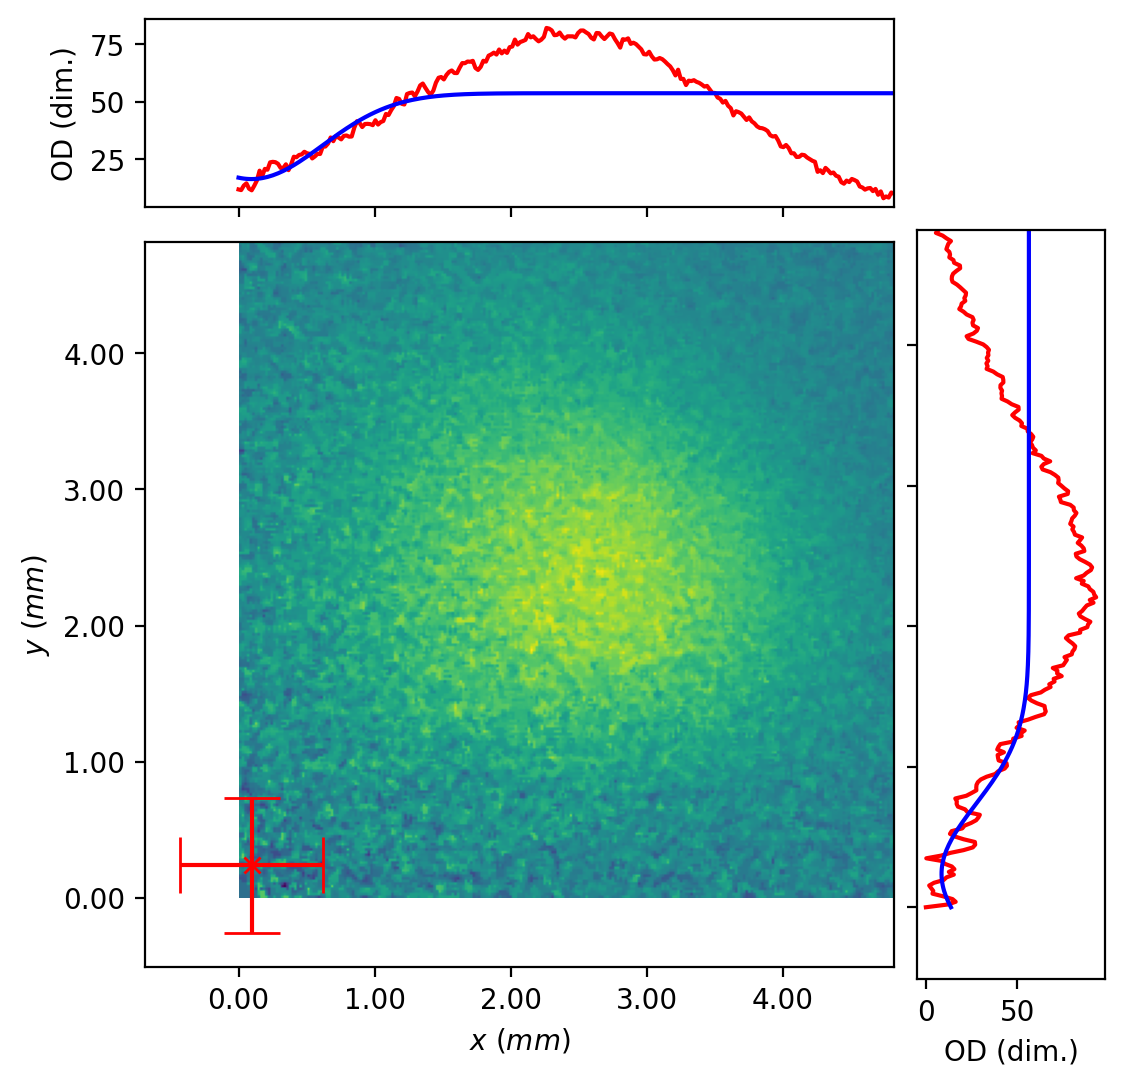

In [7]:
d.data[1].plot_fit()

In [4]:
popt, pcov = curve_fit(lambda x,a,b:a*x**2+b, d.vlist, means, sigma=errs)
popt

array([-3.60805971e-08,  2.47650499e-07])

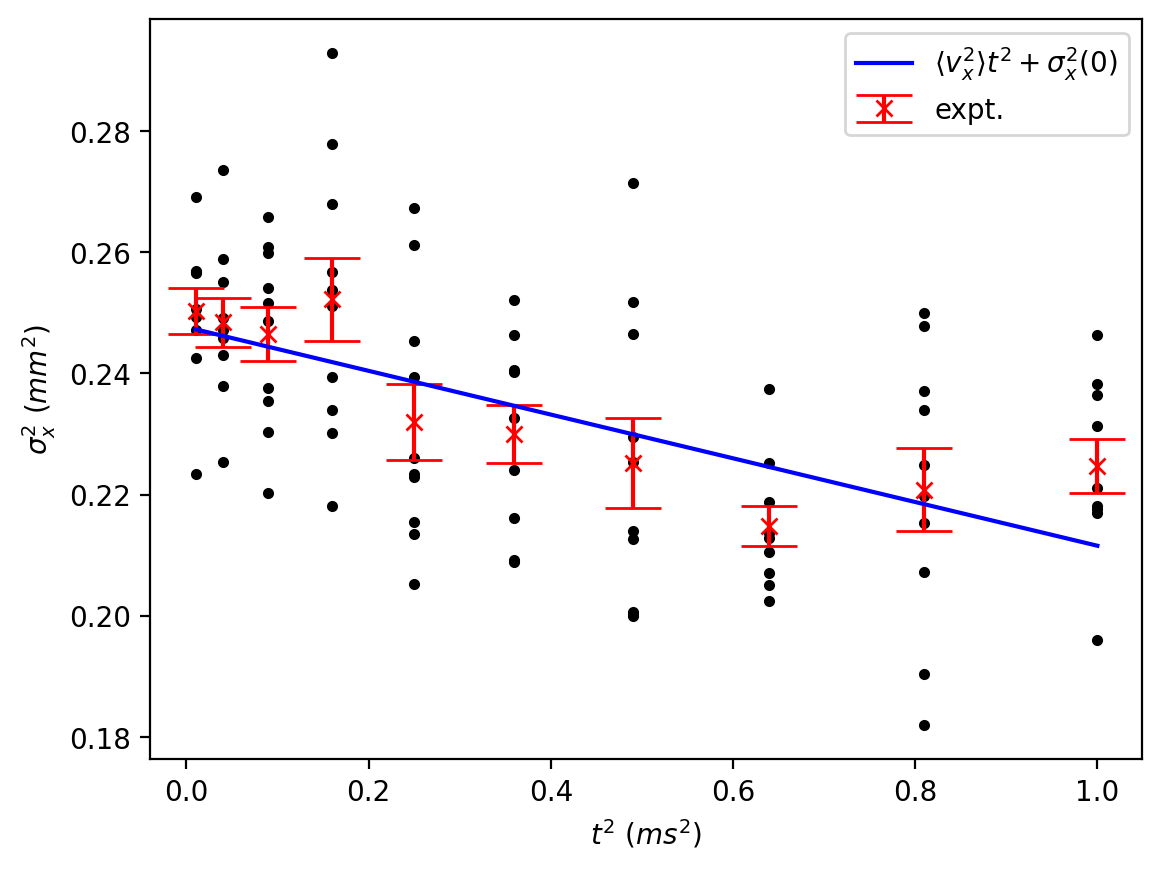

In [5]:
scale = 1e3
plt.errorbar(np.array(list((sigma_times.keys())))**2, scale**2*np.array(means), yerr = np.array(errs)*scale**2/np.sqrt(10), linestyle = "None", c = 'r', capsize=10, marker = "x", label = "expt.")
for time, arr in sigma_times.items():
    for val in arr:
        plt.scatter(time**2, scale**2*val, c="k", marker = ".")

xaxis = np.linspace(min(d.vlist), max(d.vlist), 100)
plt.plot(xaxis**2, scale**2*(popt[0]*xaxis**2+popt[1]), c="b", label = r"$\langle v_x^2\rangle t^2+\sigma_x^2(0)$")

plt.xlabel(r"$t^2 \ (ms^2)$")
plt.ylabel(r"$\sigma_x^2 \ (mm^2)$")
plt.gcf().set_dpi(200)
plt.legend()

In [9]:
pcov

array([[ 4.47800899e-19, -5.03170272e-20],
       [-5.03170272e-20,  1.99077143e-20]])

In [10]:
v_err = np.sqrt(pcov[0][0])

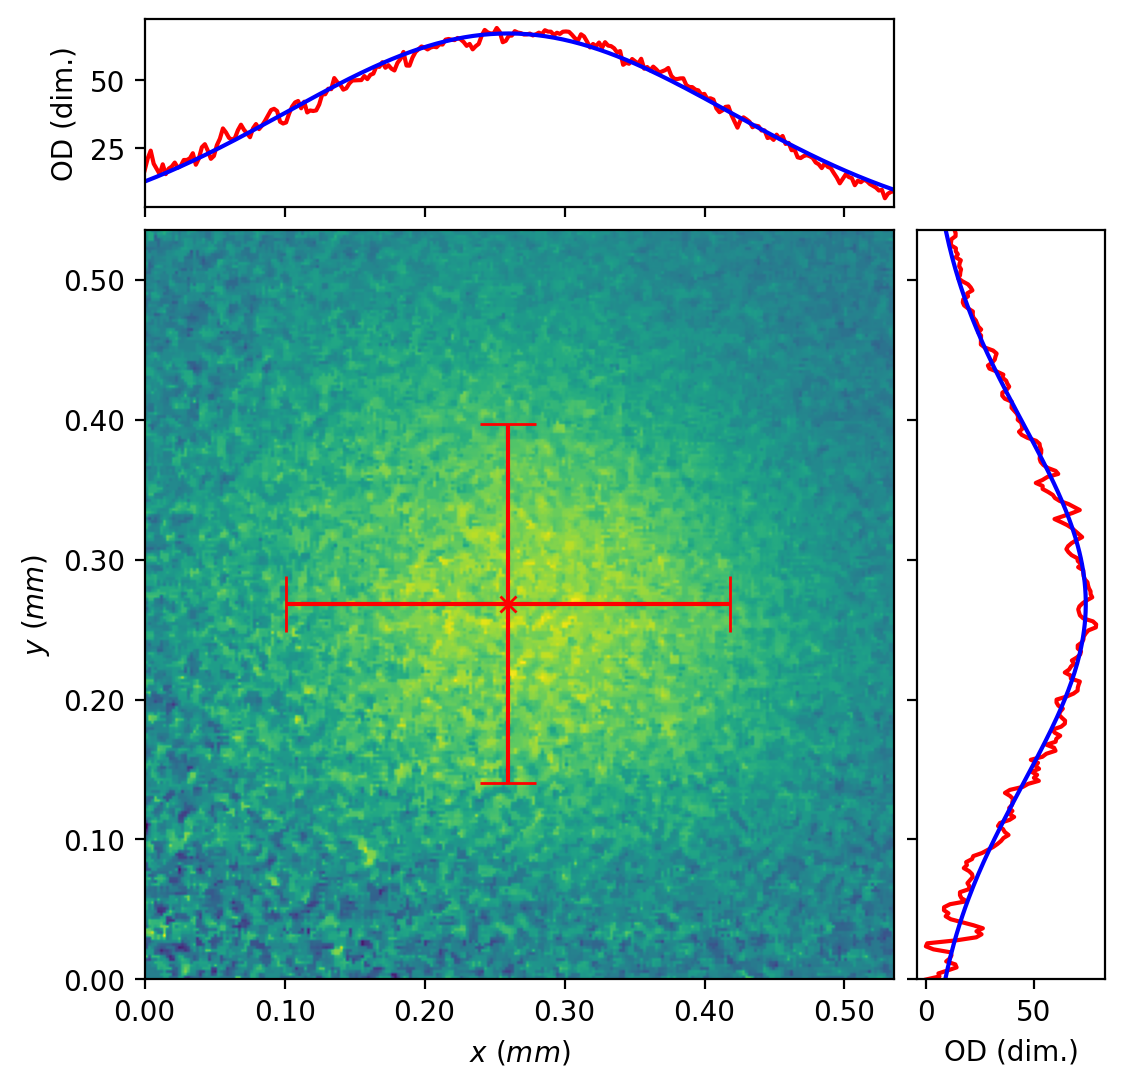

In [6]:
d.data[5].plot_fit()

In [7]:
popt

array([1.07526595e-08, 1.78984118e-08])

In [3]:
import numpy as np

In [23]:
v_rms = np.sqrt(popt[0])*1e3*np.sqrt(3)
v_err = np.sqrt(pcov[0][0])*3*1e6/(np.sqrt(9))*3

First, we have $\langle (x+vt)^2 \rangle = \langle x^2 \rangle + \langle v^2\rangle t^2$, using $\langle v \rangle = 0$, and thus the fit parameter $a$ gives the RMS velocity. Plugging this into the Maxwell-Bolzmann distribution,
$$
v_{rms} = \sqrt{\frac{3RT}{M}} \Rightarrow T = \frac{v_{rms}^2 M}{3R}
$$

$$
\sqrt{v_{rms}^2+\delta v} \approx \sqrt{v_{rms}^2}+\frac{\delta v}{2\sqrt{v_{rms}^2}}
$$

In [12]:
v_rms**2*39.1/(3*8.315)*1e3

50.562716545513034

In [13]:
v_err*39.1/(3*8.315)*1e3

3.1467119139123993

In [14]:
v_rms

0.17960506291514305

In [22]:
v_err/v_rms

0.011177512402153951

In [29]:
v_err/(2*.17)

0.0059045229947754475

In [26]:
v_err

0.0020075378182236522